In [1]:
using Convex
using ECOS
using PyPlot

INFO: Precompiling module DataStructures...
INFO: Precompiling module MathProgBase...
INFO: Precompiling module PyPlot...
INFO: Installing matplotlib via the Conda package...
Qt: Untested Windows version 10.0 detected!


In [2]:
n = 100
A = randn(n,n)
b = randn(n,1)

x = Variable(n)
println(x)

Variable of
size: (100, 1)
sign: Convex.NoSign()
vexity: Convex.AffineVexity()


In [3]:
p = minimize(0.5*sum_squares(A*x - b) + 10*norm(x,1))
solve!(p, ECOSSolver())

 in depwarn at deprecated.jl:73
 in sum_squares at deprecated.jl:30
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Dmitry\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Dmitry\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[3], in expression starting on line 1


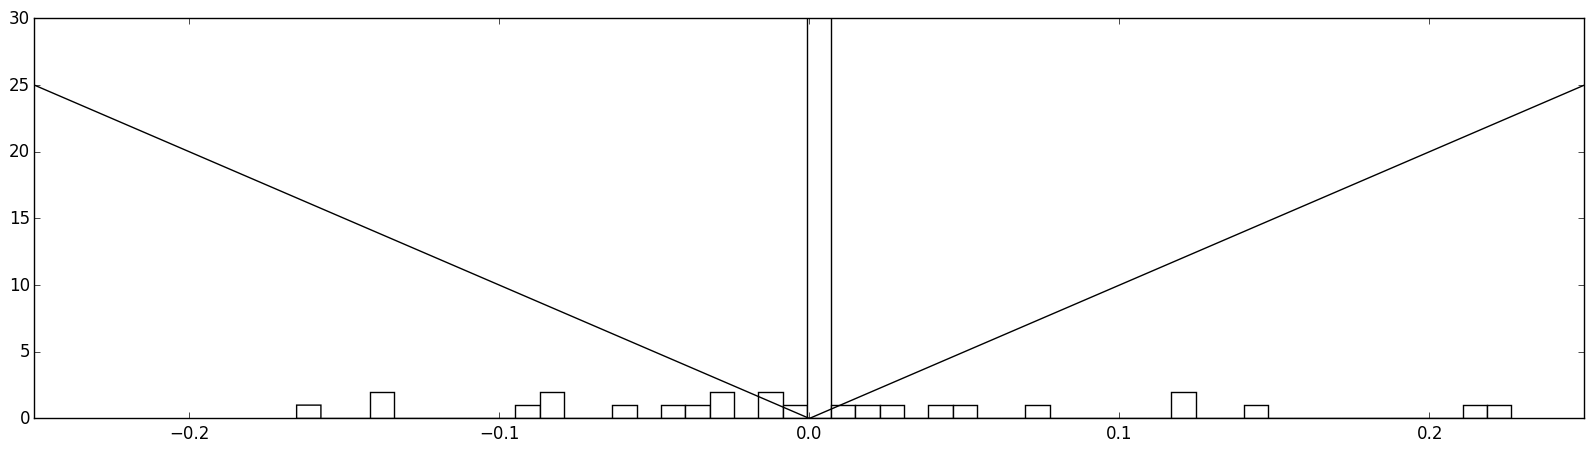

In [4]:
figure(figsize=(20,5))
r  = -0.25:(0.1/50):0.25
plt[:hist](x.value, 50, facecolor ="w")
plot(r, 100*abs(r), "k")
axis([-0.25, 0.25, 0, 30]);

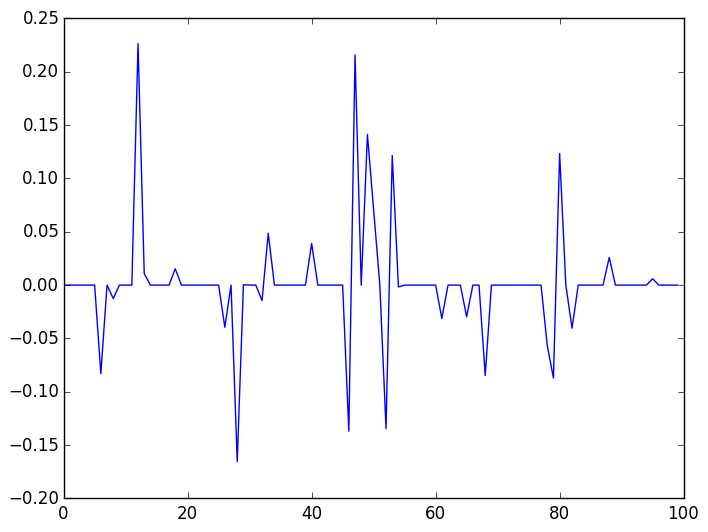

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3D91DF10>

In [5]:
plot(x.value)

In [6]:
x = Variable(n)
p = minimize(sum_squares(A*x - b) - sum(log(-x+1)) - sum(log(x+1)))
solve!(p, ECOSSolver())

 in depwarn at deprecated.jl:73
 in sum_squares at deprecated.jl:30
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Dmitry\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Dmitry\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[6], in expression starting on line 2


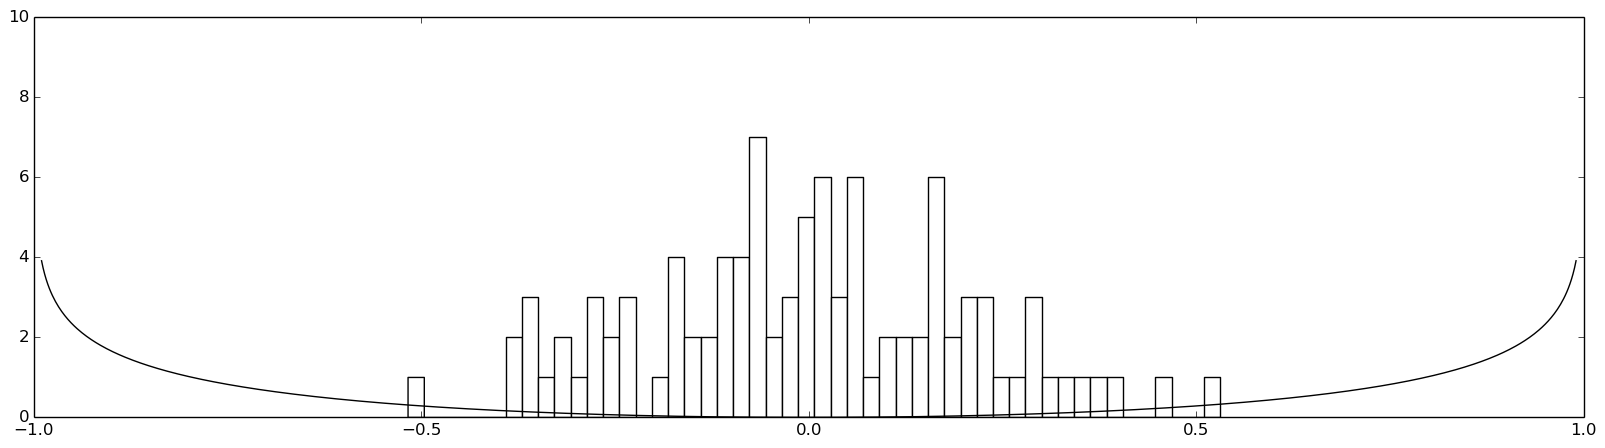

In [15]:
figure(figsize=(20,5))
r  = -0.99:(0.1/50):0.99
plt[:hist](x.value, 50, facecolor ="w")
plot(r, -(log(r+1) + log(-r+1)), "k")
axis([-1, 1, 0, 10]);

In [20]:
x = Variable(n)
p = minimize(sum_squares(A*x - b) + 0.0*sum(max(x-1, 0) + max(-x-1,0)))
solve!(p, ECOSSolver())


ECOS 2.0.2 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -2.013e+02  +6e+02  6e-01  1e+00  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  +9.596e-02  -1.421e+01  +4e+01  4e-02  4e-01  6e-02  1e-01  0.9274  3e-04   1  1  1 |  0  0
 2  +6.266e-02  -7.728e+00  +2e+01  2e-02  2e-01  7e-02  5e-02  0.8250  3e-01   2  1  2 |  0  0
 3  +6.668e-02  -7.302e+00  +1e+01  2e-02  1e-01  9e-02  3e-02  0.5386  5e-01   2  2  2 |  0  0
 4  +5.550e-02  -2.768e+00  +4e+00  7e-03  4e-02  6e-02  9e-03  0.8183  1e-01   2  2  2 |  0  0
 5  +3.952e-02  -1.806e+00  +2e+00  4e-03  4e-02  4e-02  5e-03  0.5523  1e-01   2  1  2 |  0  0
 6  +2.714e-02  -1.748e+00  +2e+00  4e-03  5e-02  4e-02  4e-03  0.5261  7e-01   2  2  2 |  0  0
 7  +1.587e-02  -1.031e-01  +7e-02  3e-04  4e-03  1e-02  2e-04  0.9887  4e-02   2  2  2 |  0  0
 8  +1.887e-03  -9.213e-03  +7e-03  3e-05  5e-

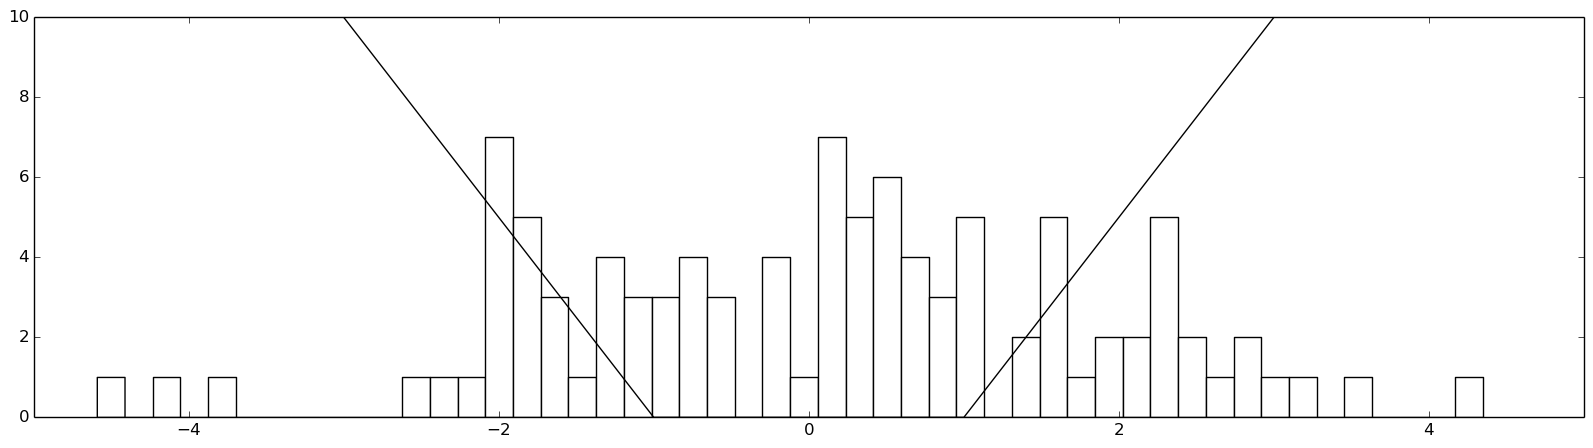

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb999614b50>

In [21]:
figure(figsize=(20,5))
r  = -3:(0.1/50):3
plt[:hist](x.value, 50, facecolor ="w")
plot(r, 5*(max(r-1,0) + max(-r-1,0)), "k")